# **Task 2: Credit Risk Prediction**


# **Objective:**
Predict whether a loan applicant is likely to default on a loan.

## **Summary:**

Both Logistic Regression and Decision Tree models were trained and evaluated for credit risk prediction.
*   **Logistic Regression:** Achieved an accuracy of 0.7432 but suffered from a significant weakness: it predicted only class 1.0 for all test samples, failing to identify any instances of class 0.0. This resulted in a recall of 0.0 for class 0.0 and a precision of 0.0 for class 0.0, indicated by a confusion matrix of `[[ 0 19], [ 0 55]]`. Its high accuracy is misleading due to this biased prediction towards the majority class.
*   **Decision Tree:** Achieved a lower accuracy of 0.6757, but demonstrated more balanced prediction behavior across both classes. Its confusion matrix `[[ 7 12], [12 43]]` shows it correctly identified 7 true negatives (class 0.0) and 43 true positives (class 1.0), indicating it can distinguish between both credit risk categories.

### Data Analysis Key Findings
*   The dataset was successfully split into training and testing sets, with 293 samples for training (`X_train`: (293, 13), `y_train`: (293,)) and 74 samples for testing (`X_test`: (74, 13), `y_test`: (74,)).
*   The Logistic Regression model exhibited an accuracy of 0.7432, but its performance was flawed as it exclusively predicted the majority class (class 1.0) for all test instances.
*   The Decision Tree model achieved an accuracy of 0.6757, which was lower than the Logistic Regression model, but it provided a more balanced classification across both positive and negative classes.
*   The Logistic Regression model completely failed to predict any instances of class 0.0, as shown by its confusion matrix: 0 true negatives and 0 false negatives.
*   The Decision Tree model, despite lower accuracy, correctly identified 7 true negatives and 43 true positives, demonstrating its ability to classify both outcomes.

### Insights or Next Steps
*   The Logistic Regression model is currently unsuitable for credit risk prediction due to its inability to identify one of the classes. Further investigation into class imbalance and application of techniques like resampling (e.g., SMOTE) or adjusting class weights is crucial.
*   The Decision Tree model provides a more robust baseline for credit risk prediction. Future steps could involve hyperparameter tuning for the Decision Tree to improve its accuracy and generalization, or exploring other ensemble methods based on Decision Trees (e.g., Random Forest, Gradient Boosting).


**Importing Labraries**

In [1]:
import numpy as py
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sl

**Loading Data-Set**

In [5]:
data = pd.read_csv('Loan_dataset.csv')
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


This code cell uses the .shape attribute of the pandas DataFrame to display the dimensions of the dataset. The output (367, 12) indicates that the dataset has 367 rows and 12 columns

In [6]:
data.shape

(367, 12)

The data.info() command tell the DataFrame, including the number of entries, columns, non-null values per column, and data types, which is essential for initial data understanding.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In this cell I used the .head() method of the pandas DataFrame to display the first 5 rows of the dataset. This is useful for getting a quick preview of the data and its structure

In [10]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In this cell I used the .tail() method of the pandas DataFrame to display the last 5 rows of the dataset. This is useful for getting a quick preview of the data and its structure

In [12]:
data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural
366,LP002989,Male,No,0,Graduate,Yes,9200,0,98.0,180.0,1.0,Rural


The code data.isnull().sum() identifies and counts the number of missing (null) values in each column of your data DataFrame, providing a quick overview of data completeness.

In [13]:
data.isnull().sum()

,0
Loan_ID,0
Gender,11
Married,0
Dependents,10
Education,0
Self_Employed,23
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,5
Loan_Amount_Term,6


**Handle missing data appropriately.**

This code addresses missing values in three numerical columns: 'LoanAmount', 'Loan_Amount_Term', and 'Credit_History'. For each of these columns, it replaces any NaN (Not a Number) values with the median value of that specific column. The median is used because it is less sensitive to outliers compared to the mean, making it a robust choice for imputing missing data in potentially skewed distributions. Finally, it prints the sum of null values again to confirm that these specific columns no longer have missing entries.

In [20]:
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].median())
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median())
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].median())
data.isnull().sum()

,0
Loan_ID,0
Gender,11
Married,0
Dependents,10
Education,0
Self_Employed,23
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


This code handles missing values in the categorical columns 'Gender', 'Dependents', and 'Self_Employed'. For each of these columns, it replaces any NaN values with the mode (most frequent value) of that column. Using the mode is a common strategy for imputing missing categorical data. After imputation, it prints the sum of null values for all columns again to confirm that all missing values have been successfully addressed.

In [22]:
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])
data['Dependents'] = data['Dependents'].fillna(data['Dependents'].mode()[0])
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])
print("Missing values after imputing categorical columns:")
data.isnull().sum()

Missing values after imputing categorical columns:


,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


The code data.duplicated() checks for duplicate rows in your DataFrame. It returns a boolean Series indicating True for rows that are exact duplicates of a previous row and False otherwise.

In [23]:
data.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
362,False
363,False
364,False
365,False


In [24]:
data.duplicated().sum()

np.int64(0)

The data.describe() command generates descriptive statistics of the numerical columns in a DataFrame. It provides insights such as count, mean, standard deviation, minimum, maximum, and the quartile values (25th, 50th, and 75th percentile) for each numerical column. This helps in understanding the central tendency, dispersion, and shape of the distribution of a data.

In [26]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,367.000000,367.000000,367.000000
mean,4805.599455,1569.577657,135.980926,342.822888,0.839237
std,4910.685399,2334.232099,60.959739,64.658402,0.367814
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,101.000000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,157.500000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


**Visualize key features such as loan amount, education, and income.**

This code generates a histogram to visualize the distribution of 'LoanAmount' in a dataset. It uses sns.histplot from Seaborn for plotting, sets the title to 'Distribution of LoanAmount' and labels the axes as 'LoanAmount($)' and 'Frequency', respectively. Finally, plt.show() displays the generated plot.

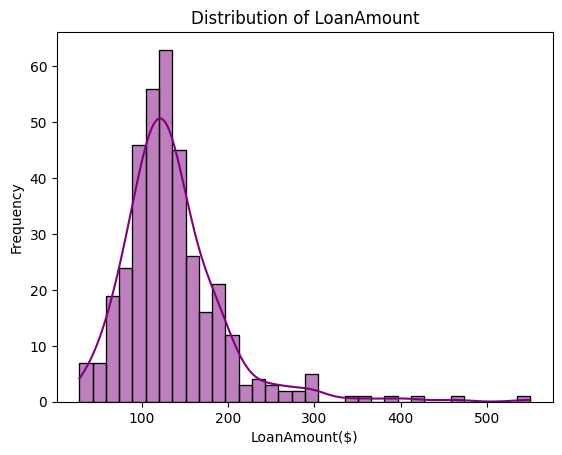

In [28]:
sns.histplot(data['LoanAmount'], kde = True, color = 'purple')
plt.title("Distribution of LoanAmount")
plt.xlabel("LoanAmount($)")
plt.ylabel("Frequency")
plt.show()

sns.countplot(x = 'Education', data = data, color='blue'): This line uses Seaborn's countplot function to create a bar plot. It visualizes the distribution of categories within the 'Education' column, showing the count of each unique education level (e.g., 'Graduate' vs. 'Not Graduate'). The x='Education' specifies the column to plot, data=data indicates the DataFrame, and color='blue' sets the bar color.
data['Education'].value_counts(): This line calculates and displays the number of occurrences for each unique value in the 'Education' column. It provides the precise counts that are visually represented by the countplot.

,count
Education,
Graduate,283
Not Graduate,84


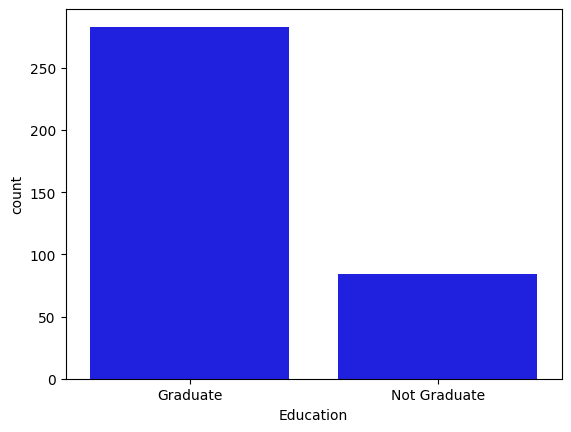

In [29]:
sns.countplot(x = 'Education', data = data, color='blue')
data['Education'].value_counts()

This code generates two box plots to visualize the income distribution of loan applicants. It uses Seaborn's sns.boxplot function to create one plot for 'ApplicantIncome' and another for 'CoapplicantIncome', each with a distinct color and title. The plt.show() command displays each plot after its creation, providing a clear visual summary of the income ranges and potential outliers for both applicant types.



ApplicantIncome of Income Distribution:


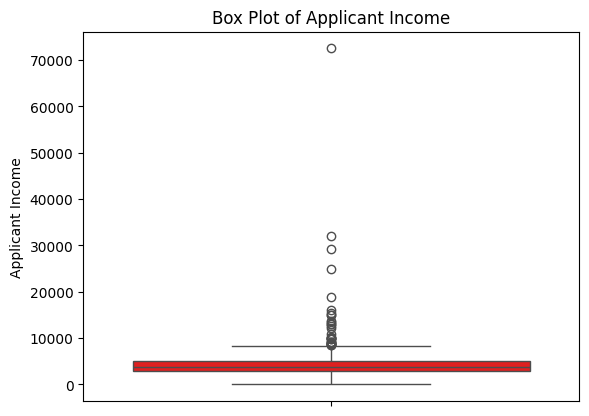

CoapplicantIncome of Income Distribution:


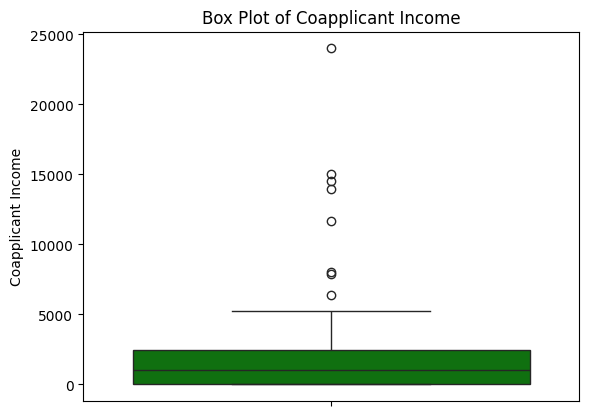

In [34]:
print("ApplicantIncome of Income Distribution:")
sns.boxplot(y='ApplicantIncome', data=data, color = 'red')
plt.title('Box Plot of Applicant Income')
plt.ylabel('Applicant Income')
plt.show()
print("CoapplicantIncome of Income Distribution:")
sns.boxplot(y='CoapplicantIncome', data=data, color='green')
plt.title('Box Plot of Coapplicant Income')
plt.ylabel('Coapplicant Income')
plt.show()

**Train a classification model like Logistic Regression or Decision Tree.**

This code removes the 'Loan_ID' column from the DataFrame, as it's an identifier not needed for modeling. It then confirms the change by displaying the new DataFrame shape and its head.

In [35]:
data = data.drop('Loan_ID', axis=1)
print("Dropped 'Loan_ID' column. New shape:", data.shape)
data.head()

Dropped 'Loan_ID' column. New shape: (367, 11)


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


This code prepares a dataset for machine learning by transforming categorical data and separating features from the target variable. It identifies categorical columns like 'Gender' and 'Education'. Then, pd.get_dummies converts these categories into numerical binary columns, with drop_first=True to prevent redundancy. The 'Credit_History' column is isolated as the target variable y, while all other processed columns form the feature set X. Finally, it prints the shapes and first few rows of X and y to show the result of this preprocessing step.

In [36]:
categorical_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
X = pd.get_dummies(data.drop('Credit_History', axis=1), columns=categorical_cols, drop_first=True)
y = data['Credit_History']

print("Shape of features (X) after one-hot encoding:", X.shape)
print("Shape of target (y):", y.shape)
print("First 5 rows of X:")
print(X.head())
print("First 5 rows of y:")
print(y.head())

Shape of features (X) after one-hot encoding: (367, 13)
Shape of target (y): (367,)
First 5 rows of X:
   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5720                  0       110.0             360.0   
1             3076               1500       126.0             360.0   
2             5000               1800       208.0             360.0   
3             2340               2546       100.0             360.0   
4             3276                  0        78.0             360.0   

   Gender_Male  Married_Yes  Dependents_1  Dependents_2  Dependents_3+  \
0         True         True         False         False          False   
1         True         True          True         False          False   
2         True         True         False          True          False   
3         True         True         False          True          False   
4         True        False         False         False          False   

   Education_Not Graduate

This code splits the dataset (features X and target y) into training and testing sets using train_test_split, with 20% reserved for testing and random_state=42 ensuring a consistent split for reproducibility.

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (293, 13)
Shape of X_test: (74, 13)
Shape of y_train: (293,)
Shape of y_test: (74,)


This code first imports the LogisticRegression model from sklearn.linear_model. It then initializes the model (log_reg_model) with random_state=42 for reproducibility and solver='liblinear' for effective optimization with smaller datasets. Finally, the fit method trains the log_reg_model using the prepared training features (X_train) and target labels (y_train), enabling it to learn the relationship between inputs and the loan credit history.

In [40]:
from sklearn.linear_model import LogisticRegression

# Instantiate Logistic Regression model with a random state for reproducibility
log_reg_model = LogisticRegression(random_state=42, solver='liblinear') # Using 'liblinear' solver for better convergence with small datasets

# Train the model
log_reg_model.fit(X_train, y_train)

print("Logistic Regression model trained successfully.")

Logistic Regression model trained successfully.


**Model evaluation using confusion matrix and accuracy**

This code block comprehensively evaluates the performance of the trained Logistic Regression model on the previously unseen test set, providing key insights into its predictive capabilities. It begins by importing essential evaluation functions: accuracy_score, classification_report, and confusion_matrix from sklearn.metrics. The log_reg_model.predict(X_test) line then uses the trained model to generate predictions (y_pred_log_reg) for the features in the test set (X_test). Subsequently, accuracy_score(y_test, y_pred_log_reg) computes the overall proportion of correctly classified instances, giving a general idea of the model's correctness. Following this, classification_report(y_test, y_pred_log_reg) generates a detailed breakdown of precision, recall, and f1-score for each class (0.0 and 1.0), along with their support, which is critical for understanding class-wise performance. confusion_matrix(y_test, y_pred_log_reg) creates a table that summarizes the actual vs. predicted classifications, showing True Positives, True Negatives, False Positives, and False Negatives. Finally, sns.heatmap from Seaborn is used to create a visual representation of this confusion matrix, making it easier to interpret the model's classification errors and successes.

Logistic Regression Accuracy: 0.7432

Logistic Regression Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        19
         1.0       0.74      1.00      0.85        55

    accuracy                           0.74        74
   macro avg       0.37      0.50      0.43        74
weighted avg       0.55      0.74      0.63        74


Logistic Regression Confusion Matrix:
[[ 0 19]
 [ 0 55]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


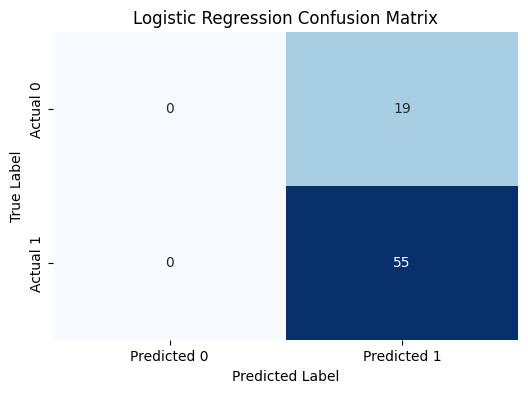

In [43]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the test set
y_pred_log_reg = log_reg_model.predict(X_test)

# Calculate accuracy
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f"Logistic Regression Accuracy: {accuracy_log_reg:.4f}")

# Generate classification report
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log_reg))

# Generate confusion matrix
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
print("\nLogistic Regression Confusion Matrix:")
print(conf_matrix_log_reg)

# Plotting the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_log_reg, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

**Train a classification model like Logistic Regression or Decision Tree.**

This code block is responsible for importing, initializing, and training a Decision Tree Classifier model. It begins by importing the DecisionTreeClassifier class from scikit-learn's tree module, which is a common algorithm for classification tasks. An instance of the Decision Tree Classifier model is then initialized with random_state=42 to ensure reproducible results. Finally, the fit method trains the decision_tree_model using the provided training features (X_train) and their corresponding target labels (y_train), allowing the model to learn decision rules from the data, and a confirmation message indicates successful training.

In [45]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate Decision Tree model with a random state for reproducibility
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Train the model
decision_tree_model.fit(X_train, y_train)

print("Decision Tree model trained successfully.")

Decision Tree model trained successfully.


**Model evaluation using confusion matrix and accuracy**

This code block comprehensively evaluates the performance of the trained Decision Tree model on the previously unseen test set. It starts by importing necessary evaluation metrics like accuracy_score, classification_report, and confusion_matrix from sklearn.metrics, along with seaborn and matplotlib.pyplot for visualization. The model then generates predictions (y_pred_dt) on the X_test data. Subsequently, the code calculates the overall accuracy_dt by comparing these predictions with the true labels (y_test), and prints a detailed classification_report showing precision, recall, and f1-score for each class. A confusion_matrix is also generated to summarize correct and incorrect predictions for each class. Finally, sns.heatmap is used to visually represent this confusion matrix, aiding in the interpretation of the model's classification performance.

Decision Tree Accuracy: 0.6757

Decision Tree Classification Report:
              precision    recall  f1-score   support

         0.0       0.37      0.37      0.37        19
         1.0       0.78      0.78      0.78        55

    accuracy                           0.68        74
   macro avg       0.58      0.58      0.58        74
weighted avg       0.68      0.68      0.68        74


Decision Tree Confusion Matrix:
[[ 7 12]
 [12 43]]


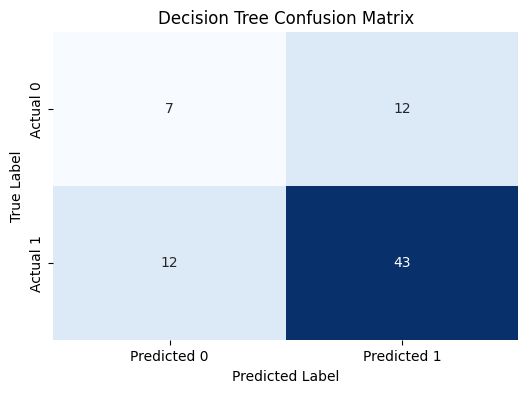

In [49]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the test set
y_pred_dt = decision_tree_model.predict(X_test)

# Calculate accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")

# Generate classification report
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

# Generate confusion matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
print("\nDecision Tree Confusion Matrix:")
print(conf_matrix_dt)

# Plotting the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Decision Tree Confusion Matrix')
plt.show()